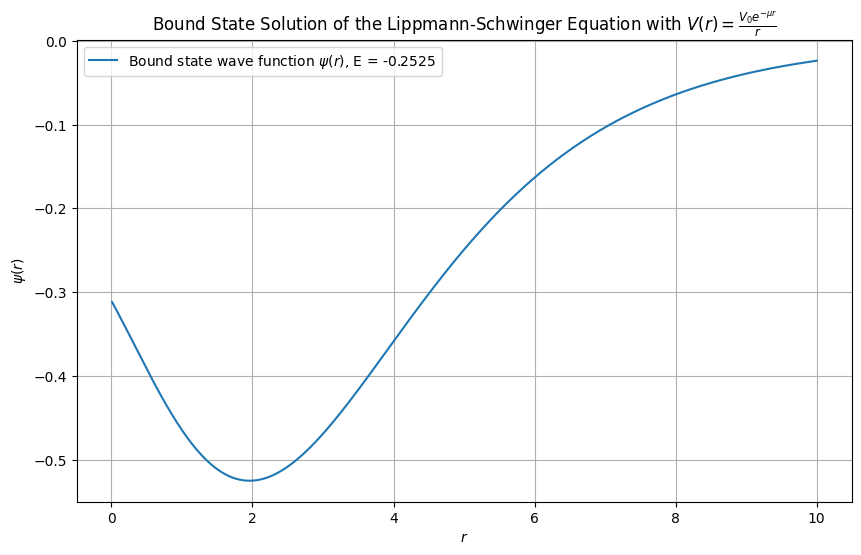

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

# Define parameters
r_min, r_max = 0.01, 10.0  # Range for radial coordinates
num_points = 1000  # Number of points for discretization
V_0 = -1.0  # Potential strength (negative for bound state)
mu = 0.7  # Decay parameter for the potential

# Discretize the radial coordinate
r = np.linspace(r_min, r_max, num_points)
dr = r[1] - r[0]

# Potential function
def V(r, V_0, mu):
    return V_0 * np.exp(-mu * r) / r

# Green's function for the bound state problem
def G_0(r, r_prime, kappa):
    return -np.exp(-kappa * np.abs(r - r_prime)) / (2 * kappa)

# Compute the matrix elements of the potential
def V_matrix(r, V_func, V_0, mu):
    V_r = V_func(r, V_0, mu)
    return np.diag(V_r)

# Compute the Green's function matrix
def G_matrix(r, kappa):
    G_mat = np.zeros((len(r), len(r)))
    for i in range(len(r)):
        for j in range(len(r)):
            if i != j:
                G_mat[i, j] = G_0(r[i], r[j], kappa) * r[j]**2 * dr
            else:
                G_mat[i, j] = 0  # Avoid singularity at i == j
    return G_mat

# Compute the integral kernel matrix
def integral_kernel_matrix(r, V_func, V_0, mu, kappa):
    V_mat = V_matrix(r, V_func, V_0, mu)
    G_mat = G_matrix(r, kappa)
    return np.dot(G_mat, V_mat)

# Solve the eigenvalue problem to find bound states
def solve_bound_states(r, V_func, V_0, mu):
    # Scan for different values of E to find negative eigenvalues
    for E in np.linspace(-1.0, 0.0, 100):
        kappa = np.sqrt(-E)
        K = integral_kernel_matrix(r, V_func, V_0, mu, kappa)
        eigenvalues, eigenvectors = eig(K)
        for i, eigenvalue in enumerate(eigenvalues):
            if eigenvalue.real > 0.9999:
                return E, eigenvectors[:, i].real
    return None, None

# Compute the bound state solution
E_bound, psi_bound = solve_bound_states(r, V, V_0, mu)

if E_bound is not None:
    # Normalize the bound state wave function
    psi_bound /= np.sqrt(np.sum(psi_bound**2) * dr)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(r, psi_bound, label=f'Bound state wave function $\\psi(r)$, E = {E_bound:.4f}')
    plt.xlabel('$r$')
    plt.ylabel('$\psi(r)$')
    plt.title('Bound State Solution of the Lippmann-Schwinger Equation with $V(r)=\\frac{V_0 e^{-\mu r}}{r}$')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No bound state found.")
